# Alignment of 3D models between adjacent time points

Since the coordinate positions of the samples in each period are not fixed, we need to align the samples of multiple periods in three dimensions, so that we can realize the four-dimensional level of spatiotemporal developmental analysis.

## Packages

In [1]:
import os
import sys
from pathlib import Path

import numpy as np

import dynamo as dyn
import spateo as st
sys.path.insert(0, "/home/yao/PythonProject/Yao_packages/morpho")
import morpho

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/home/yao/.local/lib/python3.8/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(
/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spaghetti/network.py:36: FutureWarning:

The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and poin

## Data source

In [2]:
os.chdir(f"/media/yao/Yao/Projects/Project_morpho/3d-drosophila")
save_image_folder = "models_image"
Path(save_image_folder).mkdir(parents=True, exist_ok=True)

In [3]:
# stage1: E7-9h
model1 = st.read_h5ad(filename="h5ad/E7-9h_cellbin_tdr_v1.h5ad")
model1.X = model1.layers["counts_X"].copy()
model1.uns["pp"] = {}
dyn.pp.normalize_cell_expr_by_size_factors(adata=model1, layers="X", X_total_layers=True, skip_log=False)
# stage2: E9-10h
model2 = st.read_h5ad(filename="h5ad/E9-10h_cellbin_tdr_v1.h5ad")
model2.X = model2.layers["counts_X"].copy()
model2.uns["pp"] = {}
dyn.pp.normalize_cell_expr_by_size_factors(adata=model2, layers="X", X_total_layers=True, skip_log=False)
model1, model2

|-----> rounding expression data of layer: X during size factor calculation
|-----> size factor normalize following layers: ['X']
|-----? `total_szfactor` is not `None` and it is not in adata object.
|-----> applying <ufunc 'log1p'> to layer<X>
|-----> set adata <X> to normalized data.
|-----> <insert> pp.norm_method to uns in AnnData Object.
|-----> rounding expression data of layer: X during size factor calculation
|-----> size factor normalize following layers: ['X']
|-----? `total_szfactor` is not `None` and it is not in adata object.
|-----> applying <ufunc 'log1p'> to layer<X>
|-----> set adata <X> to normalized data.
|-----> <insert> pp.norm_method to uns in AnnData Object.


(AnnData object with n_obs × n_vars = 25921 × 8136
     obs: 'area', 'slices', 'nGenes', 'nCounts', 'pMito', 'nMito', 'pass_basic_filter', 'scc', 'auto_anno', 'anno_cell_type', 'anno_tissue', 'anno_germ_layer', 'actual_stage', 'Size_Factor', 'initial_cell_size'
     uns: 'pp'
     obsm: '3d_align_spatial', 'align_spatial', 'bbox', 'before_3d_align_spatial', 'contour', 'pearson_X_pca', 'pearson_X_umap', 'spatial', 'spliced', 'tdr_spatial', 'unspliced'
     layers: 'counts_X', 'log1p_X', 'pearson_X', 'spliced', 'unspliced',
 AnnData object with n_obs × n_vars = 24327 × 8484
     obs: 'area', 'slices', 'x', 'y', 'z', 'nGenes', 'nCounts', 'pMito', 'nMito', 'pass_basic_filter', 'scc', 'auto_anno', 'anno_cell_type', 'anno_tissue', 'anno_germ_layer', 'actual_stage', 'Size_Factor', 'initial_cell_size'
     uns: 'pp'
     obsm: 'align_spatial', 'bbox', 'contour', 'pearson_X_pca', 'pearson_X_umap', 'spatial', 'tdr_spatial'
     layers: 'counts_X', 'log1p_X', 'pearson_X', 'spliced', 'unspliced')

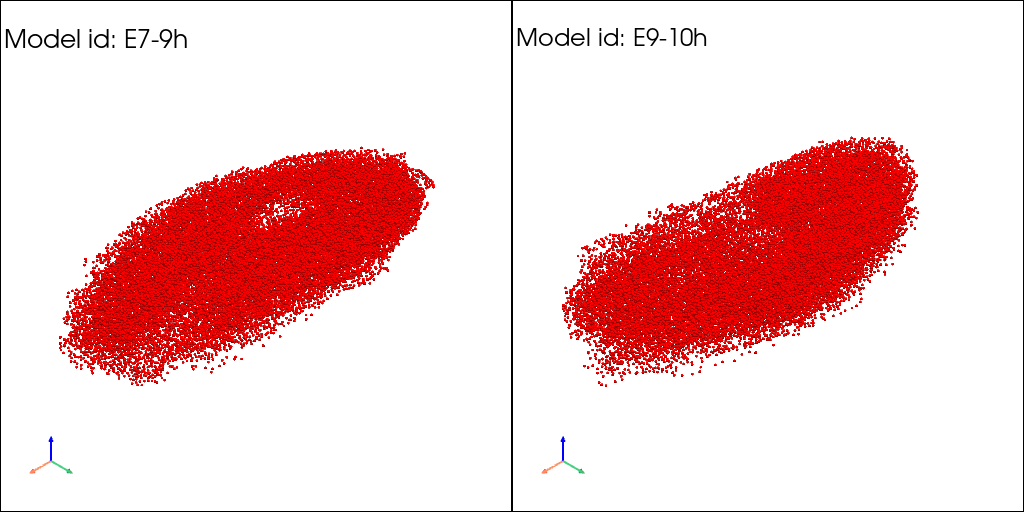

In [4]:
_ = morpho.multi_models(
    [model1, model2], spatial_key="tdr_spatial", center_zero=True, id_key="actual_stage", jupyter="static", cpo="iso",
    filename=os.path.join(save_image_folder, "drosophila_pairwise_raw_spatial_models.pdf")
)

## 3D Models alignment based on Morpho

In [5]:
align_models, align_models_ref, pis, pis_ref, _ = morpho.morpho_align_ref(
    models=[model1.copy(), model2.copy()],
    n_sampling=1000,
    sampling_method="random",
    spatial_key="tdr_spatial",
    key_added="3d_align_spatial",
    normalize_c=True,
    device="cpu",
    verbose=True,
)
align_models

|-----> [Models alignment with ref-models based on morpho, mode: SN.] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 7890 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 133.7111674518269.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [3.3057s]
|-----> Key Parameters: gamma: 0.99; beta2: 0.5; sigma2: 0.028552649829399365


RuntimeError: CUDA out of memory. Tried to allocate 1.43 GiB (GPU 0; 11.77 GiB total capacity; 8.87 GiB already allocated; 512.25 MiB free; 8.89 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## Compare the results of align-models and align-models_ref

### Visualization of models

In [ ]:
_ = morpho.multi_models(
    align_models_ref, spatial_key="3d_align_spatial", id_key="actual_stage", jupyter="static", mode="both", cpos="iso",
    filename=os.path.join(save_image_folder, "drosophila_pairwise_aligned_spatial_models_ref.pdf")
)

In [ ]:
_ = morpho.multi_models(
    align_models, spatial_key="3d_align_spatial", id_key="actual_stage", jupyter="static", mode="both", cpos="iso",
    filename=os.path.join(save_image_folder, "drosophila_pairwise_aligned_spatial_models.pdf")
)

### Visualization of cell connections between pairwise models

In [ ]:
_ = morpho.cell_connections(
    adataA=align_models_ref[0],
    adataB=align_models_ref[1],
    pi=pis_ref[0],
    spatial_key="3d_align_spatial",
    jupyter="static",
    filename=os.path.join(save_image_folder, "drosophila_pairwise_morpho_connections_ref.png")
)

In [ ]:
_ = morpho.cell_connections(
    adataA=align_models[0],
    adataB=align_models[1],
    pi=pis[0],
    spatial_key="3d_align_spatial",
    jupyter="static",
    filename=os.path.join(save_image_folder, "drosophila_pairwise_morpho_connections.png")
)

### Visualization of pi matrices

In [ ]:
morpho.pi_heatmap(
    pi=pis_ref[0], model1_name="E7-9h", model2_name="E9-10h", robust=False,
    filename=os.path.join(save_image_folder, "drosophila_pairwise_morpho_pi_heatmap_ref.png")
)

In [ ]:
morpho.pi_heatmap(
    pi=pis[0], model1_name="E7-9h", model2_name="E9-10h", robust=False,
    filename=os.path.join(save_image_folder, "drosophila_pairwise_morpho_pi_heatmap.png")
)